In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using thermobarometry to understand arc emplacement depths

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/87/Yosemite_20_bg_090404.jpg)

The Sierra Nevada and Peninsular Ranges batholiths are typically interpreted as the deep magmatic roots of ancient volcanic arcs, related to the subduction of the Farallon Plate beneath N. America. Each batholith is composed of many individual plutons, with late-stage dikes cutting through earlier intrusions.

Modern analogues to the ancient Californian volcanic arc (whose extrusive volcanic products ahve now been eroded away) include places such as the Cascades and the Andes. In these locations, the deep roots of the magmatic plumbing systems (i.e., the 'magma chambers') are rarely accessible, although eastward migration of the Andean volcanic arc has exposed some granitic plutons in Chile. As a result, studying the processes involved in the emplacement and formation of the Sierra Nevada Batholith, as well as active volcanic systems in the Cascades or Andes, provides a complimentary insight into the nature of arc magmatism.

One major question that has challenged igneous petrologists for decades is: how deep are magmas stored? This may seem like a relatively simple question that should have a simple answer, but there are many different aspects to the answer. Is magma stored at a single depth beneath a volcano or over a range of pressures? Are deep-level magma storage systems of adjacent volcanoes 'linked'? Are there temporal and/or spatial variations in the pressure of magma storage in volcanic regions, and what controls this variation?

To address these questions, petrologists have designed various barometers based on mineral compositions seen in experiments, you saw an example of this in the lab with the Schmidt (1992) equation for Al-in-hornblende barometry. We used that equation in the lab because it is simple, there are, however, dozens of different equations for pressure in igneous system, several using the composition of magmatic amphiboles (e.g., Schmidt), others using the composition of other phases such as clinopyroxene or orthopyroxene, and some using the equilibria between multiple phases (e.g., clinopyroxene-liquid thermobarometry). For magmatic arcs, the Al-in-hornblende equations are widely used and effective, largely because these barometers are designed to work in low-melt fraction systems (i.e., magmatic mushes that solidify to intrusive igneous rocks).

In this notebook, you'll be asked to take a series of Amphibole rim compositions from various locations in the Sierra Nevada and Peninsular Ranges batholiths and calculate their formation/storage pressures. Using this information, you can then start to think about questions such as: Are there differences between the emplacement depths of the Sierra Nevada and Peninsular Ranges batholiths? Are there systematic variations within each individual batholith?

------

The data loaded below is taken from Ague (1997), who looked at 18 samples from across the Sierra Nevada and Peninsular Ranges batholiths. 

If we wanted to calculate the formation/storage pressure of each amphibole, we could calculate the cation proportions for each analysis and then plug these results into the Schmidt (1992) equation (as you did in the lab). However, a better idea would be to automate these calculations, and this is where Python comes in handy! This is especially important for large datasets, while we're only dealing with 19 analyses in this example we sometimes have to deal with 100s to 1000s of analyses in a single study!

Another thing that we might want to do is test different barometric equations. As mentioned above, the Schmidt (1992) equation is not the only Al-in-hornblende barometer. This equation has been updated several times in the literature, with more recent parameterisations published in 2016 (Mutch et al., 2016) and 2021 (Ridolfi, 2021). Ideally, we'd like to use these newer expressions, which have over 20 years of new experimental data to inform their parameterisations. So how to do this?

Luckily for us, one of our own here at UC Berkeley (Prof. Wieser) has already done the work for us. She designed a Python3 package that contains 100s of different thermobarometric equations. Meaning that all we need to do is: (i) load in the data (just the oxide wt% values - conversion to cation proportions is done automatically); (ii) state what barometric equation we want to use; and (iii) interpret the results. This package is known as Thermobar (https://thermobar.readthedocs.io/en/latest/index.html) and can be installed using the following code.

-----

**Amphibole (Green Hornblende) in a Granite**

![alt text](https://www.alexstrekeisen.it/immagini/pluto/antartidegranitohbl(10).jpg)

In [2]:
#!pip install Thermobar
import Thermobar as pt

Using Thermobar, we can load in the Ague (1997) amphibole data, and ask Thermobar to isolate only the columns that contain Amphibole chemical data. This gives us an easy to use DataFrame, as shown below.

In [3]:
MyData = pt.import_excel('AgueAmphibole.xlsx', sheet_name="Sheet1")
Amps = MyData['Amps']
Amps

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,49.94,0.81,4.96,14.72,0.24,14.32,11.68,0.86,0.43,0.0,0.11,0.13,0
1,43.72,1.16,9.80,20.28,0.34,8.64,11.57,1.08,1.13,0.0,0.17,0.07,1
2,43.99,0.90,9.86,20.26,0.34,8.72,11.60,1.07,1.06,0.0,0.15,0.07,2
3,43.90,1.24,10.26,19.14,0.34,9.49,11.60,1.08,1.21,0.0,0.14,0.10,3
4,42.93,0.88,11.11,19.62,0.40,9.40,11.63,1.16,1.22,0.0,0.14,0.10,4
5,40.81,0.77,12.43,21.17,0.32,8.12,11.67,1.39,1.45,0.0,0.12,0.09,5
6,42.14,0.44,12.52,19.56,0.37,8.36,11.35,1.43,1.31,0.0,0.14,0.06,6
7,44.77,1.30,7.60,23.55,0.64,7.08,11.49,1.00,0.88,0.0,0.20,0.16,7
8,45.06,1.26,10.64,16.65,0.37,10.92,11.76,1.23,0.75,0.0,0.04,0.07,8
9,47.54,1.05,6.21,14.58,0.88,13.44,11.75,1.28,0.63,0.0,0.34,0.05,9


We'll also save another DataFrame, with all the sample information (e.g., sample name, latitude, and batholith of origin: SNB - Sierra Nevada Batholith; PRB - Peninsular Ranges Batholith; SG - San Gabriel Mountains). Doing so will allow us to compare our barometric results to the location of the sample.

In [4]:
Input = MyData['my_input']
Input

,Sample,Latitude,Batholith,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MgO_Amp,MnO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,F_Amp,Cl_Amp
0,SC-69-1b,33.8503,PRB,49.94,0.81,4.96,14.72,14.32,0.24,11.68,0.86,0.43,0.11,0.13
1,SC-69-40,33.7039,PRB,43.72,1.16,9.80,20.28,8.64,0.34,11.57,1.08,1.13,0.17,0.07
2,SC-69-41,33.7008,PRB,43.99,0.90,9.86,20.26,8.72,0.34,11.60,1.07,1.06,0.15,0.07
3,SC-69-43A,33.5672,PRB,43.90,1.24,10.26,19.14,9.49,0.34,11.60,1.08,1.21,0.14,0.10
4,SC-69-46,33.5831,PRB,42.93,0.88,11.11,19.62,9.40,0.40,11.63,1.16,1.22,0.14,0.10
5,SC-69-47,33.7161,PRB,40.81,0.77,12.43,21.17,8.12,0.32,11.67,1.39,1.45,0.12,0.09
6,SC-69-153,33.5681,PRB,42.14,0.44,12.52,19.56,8.36,0.37,11.35,1.43,1.31,0.14,0.06
7,1011-34,36.1542,SNB,44.77,1.30,7.60,23.55,7.08,0.64,11.49,1.00,0.88,0.20,0.16
8,1011-49,35.2667,SNB,45.06,1.26,10.64,16.65,10.92,0.37,11.76,1.23,0.75,0.04,0.07
9,1011-60,37.8500,SNB,47.54,1.05,6.21,14.58,13.44,0.88,11.75,1.28,0.63,0.34,0.05


Now we have our data, we can start thinking about performing some barometry calculations. The function we want to use is 'calculate_amp_only_press', but lets start by looking into the documentation to see what options are available to us. To do this, we simply type:

In [5]:
help(pt.calculate_amp_only_press)

Help on function calculate_amp_only_press in module Thermobar.amphibole:

calculate_amp_only_press(amp_comps=None, equationP=None, T=None, deltaNNO=None, classification=False, Ridolfi_Filter=True)
    Amphibole-only barometry, returns pressure in kbar.
    
    Parameters
    -----------
    
    amp_comps: pandas.DataFrame
        Amphibole compositions with column headings SiO2_Amp, MgO_Amp etc.
    
    
    EquationP: str
        | P_Mutch2016 (T-independent)
        | P_Ridolfi2012_1a (T-independent)
        | P_Ridolfi2012_1b (T-independent)
        | P_Ridolfi2012_1c (T-independent)
        | P_Ridolfi2012_1d (T-independent)
        | P_Ridolfi2012_1e (T-independent)
        | P_Ridolfi2021 - (T-independent)- Uses new algorithm in 2021 paper to
        select pressures from equations 1a-e.
        | P_Medard2022. Choose how you want the sites calculated:
            P_Medard2022_RidolfiSites, LeakeSites, MutchSites
    
        | P_Ridolfi2010  (T-independent)
        | P_Hammar

This tells us the different parameters that are required for this equation to work, and the options that are available to us. For our purposes, we only need to worry about the first two parameters, 'amp_comps' and 'equationP', the remaining parameters are only required for certain equations (e.g., a Temperature must be specified if the equation of Anderson (1995) is used).

---

To start, let's stick with the Schmidt (1992) equation. We'll use this as a demonstration to show how Thermobar works.

All we need to specify is our Amphibole compositions (the Amps DataFrame) and the equation to use ("P_Schmidt1992"). Results are given in kbar.

In [6]:
P_Schmidt = pt.calculate_amp_only_press(amp_comps = Amps, equationP = "P_Schmidt1992")
P_Schmidt

0     1.057281
1     5.375107
2     5.407731
3     5.671375
4     6.424294
5     7.710225
6     7.717363
7     3.546573
8     5.812393
9     2.164724
10    1.120393
11    7.795442
12    4.761065
13    0.566131
14    5.571576
15    3.134223
16    3.386772
17    5.633281
18    8.944597
Name: Al_Amp_cat_23ox, dtype: float64

These results can then be saved to our Input DataFrame with the following:

In [7]:
Input['P_Schmidt (kbar)'] = P_Schmidt
Input

,Sample,Latitude,Batholith,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MgO_Amp,MnO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,F_Amp,Cl_Amp,P_Schmidt (kbar)
0,SC-69-1b,33.8503,PRB,49.94,0.81,4.96,14.72,14.32,0.24,11.68,0.86,0.43,0.11,0.13,1.057281
1,SC-69-40,33.7039,PRB,43.72,1.16,9.80,20.28,8.64,0.34,11.57,1.08,1.13,0.17,0.07,5.375107
2,SC-69-41,33.7008,PRB,43.99,0.90,9.86,20.26,8.72,0.34,11.60,1.07,1.06,0.15,0.07,5.407731
3,SC-69-43A,33.5672,PRB,43.90,1.24,10.26,19.14,9.49,0.34,11.60,1.08,1.21,0.14,0.10,5.671375
4,SC-69-46,33.5831,PRB,42.93,0.88,11.11,19.62,9.40,0.40,11.63,1.16,1.22,0.14,0.10,6.424294
5,SC-69-47,33.7161,PRB,40.81,0.77,12.43,21.17,8.12,0.32,11.67,1.39,1.45,0.12,0.09,7.710225
6,SC-69-153,33.5681,PRB,42.14,0.44,12.52,19.56,8.36,0.37,11.35,1.43,1.31,0.14,0.06,7.717363
7,1011-34,36.1542,SNB,44.77,1.30,7.60,23.55,7.08,0.64,11.49,1.00,0.88,0.20,0.16,3.546573
8,1011-49,35.2667,SNB,45.06,1.26,10.64,16.65,10.92,0.37,11.76,1.23,0.75,0.04,0.07,5.812393
9,1011-60,37.8500,SNB,47.54,1.05,6.21,14.58,13.44,0.88,11.75,1.28,0.63,0.34,0.05,2.164724


Now that you've got an idea of how this works. Do the same calculations but use the updated equations of "P_Mutch2016" and "P_Ridolfi2021". Save the results to the Input DataFrame as shown above for the Schimdt results. **Note** the output from these calculations for the Mutch and Ridolfi equations are more complex and worth taking a quick look at! To access the pressure results type df['P_kbar_calc'] where df represents the name of your output. To view the full output simply type df after completing the calculation:

e.g., 

P_new = pt.calculate_amp_only_press(amp_comps = Amps, equationP = "P_...")

To view pressure results: P_new['P_kbar_calc']

To view all results: P_new or print(P_new)

In [8]:
P_Mutch = pt.calculate_amp_only_press(amp_comps = Amps, equationP = "P_Mutch2016")
P_Ridolfi = pt.calculate_amp_only_press(amp_comps = Amps, equationP = "P_Ridolfi2021")

Input['P_Mutch (kbar)'] = P_Mutch['P_kbar_calc']
Input['P_Ridolfi (kbar)'] = P_Ridolfi['P_kbar_calc']
Input

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Sample,Latitude,Batholith,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MgO_Amp,MnO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,F_Amp,Cl_Amp,P_Schmidt (kbar),P_Mutch (kbar),P_Ridolfi (kbar)
0,SC-69-1b,33.8503,PRB,49.94,0.81,4.96,14.72,14.32,0.24,11.68,0.86,0.43,0.11,0.13,1.057281,1.498186,NaN
1,SC-69-40,33.7039,PRB,43.72,1.16,9.80,20.28,8.64,0.34,11.57,1.08,1.13,0.17,0.07,5.375107,4.123734,NaN
2,SC-69-41,33.7008,PRB,43.99,0.90,9.86,20.26,8.72,0.34,11.60,1.07,1.06,0.15,0.07,5.407731,4.145558,NaN
3,SC-69-43A,33.5672,PRB,43.90,1.24,10.26,19.14,9.49,0.34,11.60,1.08,1.21,0.14,0.10,5.671375,4.358649,2.043088
4,SC-69-46,33.5831,PRB,42.93,0.88,11.11,19.62,9.40,0.40,11.63,1.16,1.22,0.14,0.10,6.424294,4.960899,2.482157
5,SC-69-47,33.7161,PRB,40.81,0.77,12.43,21.17,8.12,0.32,11.67,1.39,1.45,0.12,0.09,7.710225,6.142470,NaN
6,SC-69-153,33.5681,PRB,42.14,0.44,12.52,19.56,8.36,0.37,11.35,1.43,1.31,0.14,0.06,7.717363,6.215125,NaN
7,1011-34,36.1542,SNB,44.77,1.30,7.60,23.55,7.08,0.64,11.49,1.00,0.88,0.20,0.16,3.546573,2.813762,NaN
8,1011-49,35.2667,SNB,45.06,1.26,10.64,16.65,10.92,0.37,11.76,1.23,0.75,0.04,0.07,5.812393,4.485513,2.312778
9,1011-60,37.8500,SNB,47.54,1.05,6.21,14.58,13.44,0.88,11.75,1.28,0.63,0.34,0.05,2.164724,2.014934,1.076911


What you will likely notice, if you look at the results, is that several analyses return no results (NaN) when the Ridolfi (2021) geobarometer is used. This is because there are various tests used to determine if a particular analyses is appropriate for the barometric calculation.

Using the results you've saved. Plot up the pressures calculated using the Schmidt (2012) and Mutch et al. (2016) equations. Remember to label your axes!

Text(0, 0.5, 'Pressure (kbar) - M16')

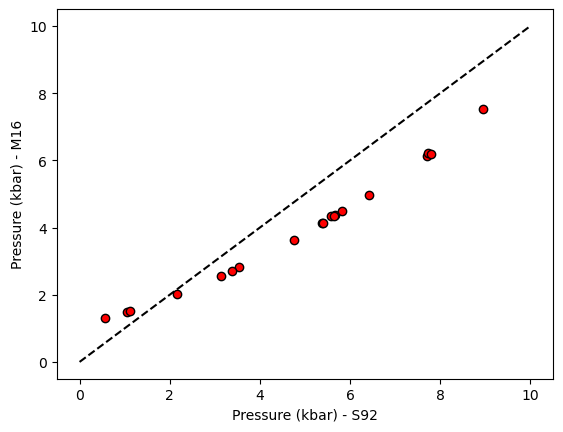

In [9]:
f, a = plt.subplots(1,1)
a.plot([0,10],[0,10], '--k') # 1:1 line - all samples should plot along here if the barometers match!
a.plot(Input['P_Schmidt (kbar)'], Input['P_Mutch (kbar)'], 'ok', mfc = 'red')
a.set_xlabel('Pressure (kbar) - S92')
a.set_ylabel('Pressure (kbar) - M16')

Briefly compare the results. Using the results from the Mutch et al. (2016) equation, what is the range of emplacement pressures for the Sierra Nevada and Peninsular Ranges batholiths? Using an average crustal density of 2.9 g/cm$^3$ convert these pressures into depth.

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

Have a look at the outputs. For the samples where results are obtained, how do the pressures estimated by the Ridolfi (2021) expressions compare to the Mutch et al. (2016) equations?

The Ridolfi calibration is designed for high-temperature, near-liquidus magmas, whereas the Mutch calibration is designed for low-temperature, near-solidus conditions. Which is most likely to be appropriate to granites from the Sierra Nevada and Peninsular Ranges batholiths? (comparing the two is to show that there are an awful lot of geobarometers in the literature. Understanding where and how they work is critical to getting the best results).

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

## Within and between arc variations?

In the Input DataFrame you have the latitude at which each of these samples were collected. Plot the barometric results from the Mutch et al. (2016) equations (and others if you're interested) against latitude. Color the results by batholith name.

**Hint** when plotting from a dataframe, you can plot a subset of data based on values in a different column. In this example, you could type a.plot(Input['P_Schmidt (kbar)'][Input['Batholith'] == 'SNB'], 'ok', mfc = 'r') to only plot data from the Sierra Nevada Batholith (using the Schmidt equation).

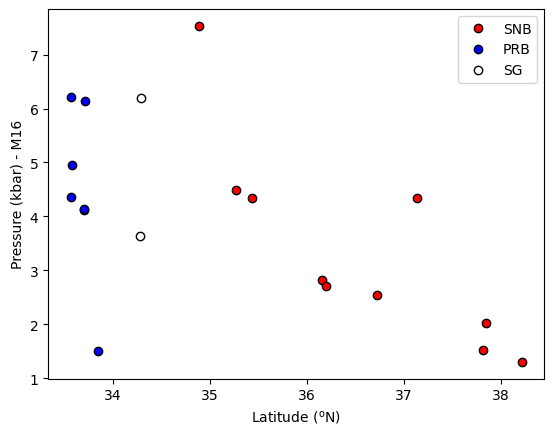

In [12]:
f, a = plt.subplots(1,1)
a.plot(Input['Latitude'][Input['Batholith'] == 'SNB'], 
       Input['P_Mutch (kbar)'][Input['Batholith'] == 'SNB'], 'ok', mfc = 'red', label = "SNB")
a.plot(Input['Latitude'][Input['Batholith'] == 'PRB'], 
       Input['P_Mutch (kbar)'][Input['Batholith'] == 'PRB'], 'ok', mfc = 'blue', label = "PRB")
a.plot(Input['Latitude'][Input['Batholith'] == 'SG'], 
       Input['P_Mutch (kbar)'][Input['Batholith'] == 'SG'], 'ok', mfc = 'w', label = "SG")
a.set_xlabel('Latitude ($^o$N)')
a.set_ylabel('Pressure (kbar) - M16')
a.legend()

Using these results, comment of whether or not there are differences in the emplacement depth of granite plutons between the Sierra Nevada and Peninsular Ranges batholiths.

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

Are there any variations within the Sierra Nevada Batholith that correlates with latitude? If so, how does emplacement depth vary along the arc?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

Plot up the results from the Ridolfi (2021) expression against Latitude. How do these compare to the Mutch et al. (2016) results (think about both absolute values and relative N-S differences)?

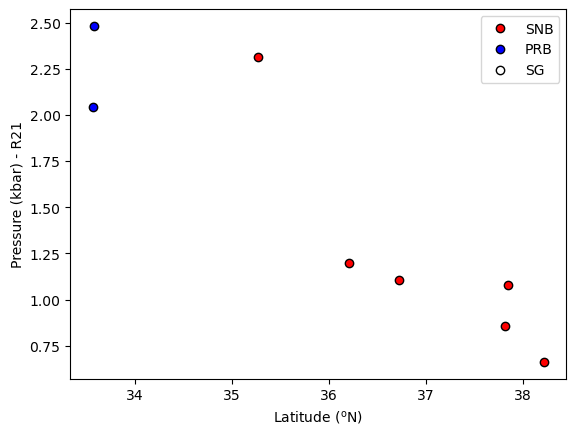

In [14]:
f, a = plt.subplots(1,1)
a.plot(Input['Latitude'][Input['Batholith'] == 'SNB'], 
       Input['P_Ridolfi (kbar)'][Input['Batholith'] == 'SNB'], 'ok', mfc = 'red', label = "SNB")
a.plot(Input['Latitude'][Input['Batholith'] == 'PRB'], 
       Input['P_Ridolfi (kbar)'][Input['Batholith'] == 'PRB'], 'ok', mfc = 'blue', label = "PRB")
a.plot(Input['Latitude'][Input['Batholith'] == 'SG'], 
       Input['P_Ridolfi (kbar)'][Input['Batholith'] == 'SG'], 'ok', mfc = 'w', label = "SG")
a.set_xlabel('Latitude ($^o$N)')
a.set_ylabel('Pressure (kbar) - R21')
a.legend()

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

In a true petrological investigation of the Sierra Nevada Batholith, looking at variations in the emplacement depth, there are several other pieces of evidence that would be useful for us to known to fully interpret these results. What other information would be useful for us in our attempt to understand whether there are latitudinal variations in the emplacement depth of granite plutons along the Sierra Nevada Batholith?

**Hint** The Sierra Nevada formed over a long time period, stretching from the Triassic through to the Jurassic. How do we distinguish spatial and temporal variations?

**Hint** Al-in-hornblende based barometers are calibrated for certain systems. For example, the Mutch et al. (2016) barometer should only be applied to amphibole rims that are in equilibrium (or formed from) melts that were also saturated in plagioclase, alkali feldspar, quartz, biotite and Fe-Ti oxides. How would we check that our barometric results are reliable?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)